## Pandas analysis

In the following a series of exercises is proposed on a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGA's. Each measurement (i.e. each raw) consists of the address of the TDC providing the signal, 'FPGA' and 'TDC_Channel, and the timing information itself, 'ORBIT_CNT', 'BX_COUNTER' and 'TDC_MEAS'. Each TDC count correspond 25/30 ns, whereas the BX_COUNTER feauters gets updated every 25 ns and the ORBIT_CNT every 'x' BX_COUNTER. You can see these way of storing the time as similar to hours, minutes and seconds.

1\. Create a Pandas DataFrame by read N raws of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of raws and larger that 10k.

2\. Find out the value of 'x'

3\. Find out how much the data taking lasted. You can either make an estimate on the baseis of the fraction of the measurements (raws) you read, or perform this check precisely by reading out the whole dataset

4\. Create a new column with the actual time in ns (as a combination of the other three columns with timing information)

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1

6\. Create a new DataFrame with only the raws with HEAD=1

7\. Make two occupancy plots (one per FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

## EX 1

In [1]:
import pandas as pd
import numpy as np

In [3]:
filename = 'data_000637.txt'
#data=pd.read_csv(filename, nrows=2000)
data = pd.read_csv(filename)

In [4]:
#data.describe()

In [5]:
data.columns

Index(['HEAD', 'FPGA', 'TDC_CHANNEL', 'ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS'], dtype='object')

In [6]:
data.head(15)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


 Each measurement (i.e. each raw) consists of the address of the TDC providing the signal, 'FPGA' and 'TDC_Channel, and the timing information itself, 'ORBIT_CNT', 'BX_COUNTER' and 'TDC_MEAS'. Each TDC count correspond 25/30 ns, whereas the BX_COUNTER feauters gets updated every 25 ns and the ORBIT_CNT every 'x' BX_COUNTER.
 time = TDC*25ns/30 + bx counter * 25

In [7]:
#data.mean()

In [8]:
import matplotlib.pyplot as plt
data['ORBIT_CNT'].plot()
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
#data['BX_COUNTER'].plot()
#plt.show()

## EX2

In [10]:
#data[data.BX_COUNTER > 3400]

In [11]:
x = data['BX_COUNTER'].max()
x

3563

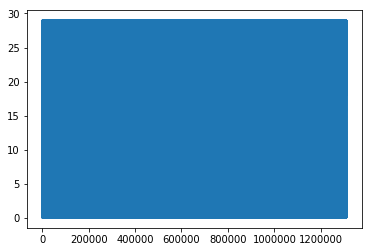

In [12]:
data['TDC_MEAS'].plot()
plt.show()

## EX4

In [13]:
a = 3563*25
b = 25
c = 25/30
#data['time'] = pd.Series(data[['ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS']].apply(lambda x,y,z : x*a + y*b + z*c))
data['time_ns'] = data['ORBIT_CNT']*a + data['BX_COUNTER']*b + data['TDC_MEAS']*c 
#data['time_ns'] = data['BX_COUNTER']*b + data['TDC_MEAS']*c 

In [14]:
data['time_ns']

0          3.446490e+14
1          3.446490e+14
2          3.446490e+14
3          3.446490e+14
4          3.446490e+14
5          3.446490e+14
6          3.446490e+14
7          3.446490e+14
8          3.446490e+14
9          3.446490e+14
10         3.446490e+14
11         3.446490e+14
12         3.446490e+14
13         3.446490e+14
14         3.446490e+14
15         3.446490e+14
16         3.446490e+14
17         3.446490e+14
18         3.446490e+14
19         3.446490e+14
20         3.446490e+14
21         3.446490e+14
22         3.446490e+14
23         3.446490e+14
24         3.446490e+14
25         3.446490e+14
26         3.446490e+14
27         3.446490e+14
28         3.446490e+14
29         3.446490e+14
               ...     
1310690    3.446500e+14
1310691    3.446500e+14
1310692    3.446500e+14
1310693    3.446500e+14
1310694    3.446500e+14
1310695    3.446500e+14
1310696    3.446500e+14
1310697    3.446500e+14
1310698    3.446500e+14
1310699    3.446500e+14
1310700    3.446

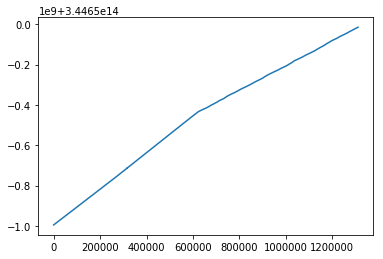

In [15]:
data['time_ns'].plot()
plt.show()

## EX3

In [16]:
elapsed_time = (data['time_ns'].iloc[-1] - data['time_ns'].iloc[0])
print(elapsed_time, 'ns')

980140993.3125 ns


## EX5

In [17]:
N = data.shape[0]
data['HEAD'] = np.random.randint(0, high = 2, size = N)

In [18]:
#help(np.random.randint)

In [19]:
data['HEAD'].mean()

0.4999961853027344

## EX 6 /  7 / 8
Make two occupancy plots (one per FPGA), i.e. plot the number of counts per TDC channel

In [22]:
data['counts'] = 0
one_one = data[(data['HEAD'] == 1) & (data['FPGA'] == 1)]
one_zero = data[(data['HEAD'] == 1) & (data['FPGA'] == 0)]
zero_one = data[(data['HEAD'] == 0) & (data['FPGA'] == 1)]
zero_zero = data[(data['HEAD'] == 0) & (data['FPGA'] == 0)]

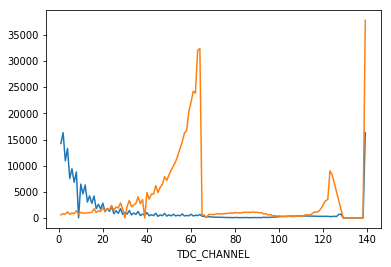

In [23]:
one_one_ch_count = one_one.groupby('TDC_CHANNEL')['counts'].count()
one_zero_ch_count = one_zero.groupby('TDC_CHANNEL')['counts'].count()
zero_one_ch_count = zero_one.groupby('TDC_CHANNEL')['counts'].count()
zero_zero_ch_count = zero_zero.groupby('TDC_CHANNEL')['counts'].count()

one_one_ch_count.plot()
one_zero_ch_count.plot()
plt.show()

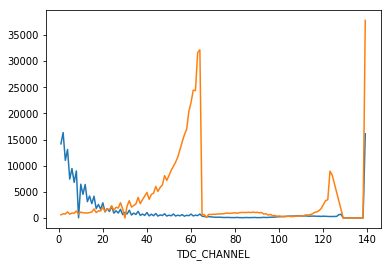

In [24]:
#doesn't depend on head (of course), but only on FPGA
zero_one_ch_count.plot()
zero_zero_ch_count.plot()
plt.show()

## EX8
Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [43]:
#top 3
#one_one_ch_count.sort_values(ascending = False)[:3]
# or all
one_one_ch_count.sort_values(ascending = False)

TDC_CHANNEL
139    16323
2      16316
1      14251
4      13293
3      10939
6       9397
8       8798
5       7555
7       6824
10      6484
12      6315
11      4604
14      4226
16      4200
13      3059
20      2845
15      2815
18      2626
24      2200
22      1835
28      1797
17      1785
19      1715
32      1423
26      1377
23      1261
36      1254
21      1190
30      1061
40      1037
       ...  
71       159
72       156
93       146
95       133
74       132
96       121
81       108
94       107
75       104
77       102
85       100
89        98
76        93
80        88
91        86
78        82
83        80
90        77
84        76
87        75
92        71
79        70
88        65
86        60
82        58
9         37
138       21
137       18
129       15
130       14
Name: counts, Length: 132, dtype: int64

## EX9

Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [40]:
orbits = np.array(data['ORBIT_CNT'])
unique_orbits = np.unique(orbits)
print('Number of unique orbits: ', len(unique_orbits))

Number of unique orbits:  11001


In [42]:
# TDC_CHANNEL=139 (that is the most busy channel!)
data139 = data[data['TDC_CHANNEL'] == 139]
orbits139 = np.array(data139['ORBIT_CNT'])
unique_orbits139 = np.unique(orbits139)
print('Number of unique orbits with at least one measurement from TDC_CHANNEL=139: ', len(unique_orbits139))

Number of unique orbits with at least one measurement from TDC_CHANNEL=139:  10976


In [45]:
# let's see for the least busy channel: TDC_CHANNEL = 130
data130 = data[data['TDC_CHANNEL'] == 130]
orbits130 = np.array(data130['ORBIT_CNT'])
unique_orbits130 = np.unique(orbits130)
print('Number of unique orbits with at least one measurement from TDC_CHANNEL=130: ', len(unique_orbits130))

Number of unique orbits with at least one measurement from TDC_CHANNEL=130:  67
